the motive of this assignment is to apply every parameter and also plot roc_auc_curve of train and test data and also plot 3d plot n_estimator,max_depth and roc_curve

In [1]:
import pyforest
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import pydotplus

/home/sushil/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
lazy_imports()

['import dash',
 'from sklearn.model_selection import train_test_split',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn import svm',
 'import bokeh',
 'import gensim',
 'from openpyxl import load_workbook',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.manifold import TSNE',
 'import glob',
 'import sys',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import plotly.express as px',
 'import pandas as pd',
 'import sklearn',
 'import statistics',
 'import pickle',
 'import spacy',
 'from dask import dataframe as dd',
 'import re',
 'import seaborn as sns',
 'import matplotlib as mpl',
 'import numpy as np',
 'import altair as alt',
 'import keras',
 'import os',
 'import pydot',
 'from pathlib import Path',
 'import nltk',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import matplotlib.pyplot as plt',
 'from sklearn.preprocessing import OneHotEncoder',
 'import tensorf

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [4]:
datasets=pd.read_csv("/home/sushil/Downloads/py-master/ML/9_decision_tree/Exercise/titanic.csv")

<IPython.core.display.Javascript object>

In [5]:
datasets.Sex=datasets.Sex.map({"male":1,"female":0})
datasets

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    1  27.0      0   
887                       Graham, Miss. Margaret Edith    0  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0   NaN      1   
889                              Behr, Mr. Karl Howell    1  26.0      0   
890                                Dooley, Mr. Patrick    1  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [6]:
Y=datasets.Survived
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
#datasets.drop(["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"], axis=1, inplace=True)
datasets.drop(["PassengerId","Survived","Name","Ticket","Cabin","Embarked"], axis=1, inplace=True)


In [8]:
X=datasets
X

Pclass  Sex   Age  SibSp  Parch     Fare
0         3    1  22.0      1      0   7.2500
1         1    0  38.0      1      0  71.2833
2         3    0  26.0      0      0   7.9250
3         1    0  35.0      1      0  53.1000
4         3    1  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    1  27.0      0      0  13.0000
887       1    0  19.0      0      0  30.0000
888       3    0   NaN      1      2  23.4500
889       1    1  26.0      0      0  30.0000
890       3    1  32.0      0      0   7.7500

[891 rows x 6 columns]

In [9]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
#df.Age = datasets.Age.fillna()
datasets.Age= datasets.Age.interpolate()

In [11]:
datasets.Fare.value_counts(dropna=False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [12]:
datasets.Fare= datasets.Fare.interpolate()

In [13]:
X=datasets

In [14]:
X

Pclass  Sex   Age  SibSp  Parch     Fare
0         3    1  22.0      1      0   7.2500
1         1    0  38.0      1      0  71.2833
2         3    0  26.0      0      0   7.9250
3         1    0  35.0      1      0  53.1000
4         3    1  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    1  27.0      0      0  13.0000
887       1    0  19.0      0      0  30.0000
888       3    0  22.5      1      2  23.4500
889       1    1  26.0      0      0  30.0000
890       3    1  32.0      0      0   7.7500

[891 rows x 6 columns]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_test))

<IPython.core.display.Javascript object>

(623, 6)
(268, 6)
623
268


In [16]:
dt=DecisionTreeClassifier()
parameters={"max_depth":list(np.arange(10,100,3)),"min_samples_leaf":list(np.arange(7,20))}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
list(np.arange(7,20))

<IPython.core.display.Javascript object>

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

In [19]:
%%time
clf=GridSearchCV(dt,param_grid=parameters,scoring="roc_auc",cv=4,return_train_score=True)
clf.fit(x_train,y_train)

CPU times: user 13 s, sys: 30.8 ms, total: 13.1 s
Wall time: 13.2 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 13, 16, 19, 22, 25, 28, 31, 34, 37,

In [20]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 37, 'min_samples_leaf': 18}
0.8558244320856874


In [21]:
import sklearn.metrics as metrics
y_train_pred=clf.predict_proba(x_train)
fpr_tr,tpr_tr,threshold=roc_curve(y_train,y_train_pred[:,1])
roc_auc_tr=metrics.auc(fpr_tr,tpr_tr)
y_pred=clf.predict_proba(x_test)
fpr,tpr,thrshold=roc_curve(y_test,y_pred[:,1])
roc_auc=metrics.auc(fpr,tpr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

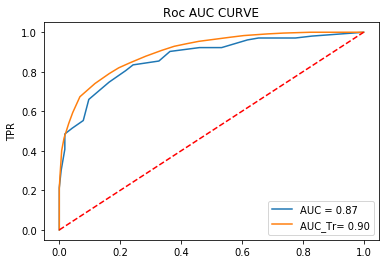

In [22]:
plt.plot(fpr,tpr,label="AUC = %0.2f "%roc_auc)
plt.plot(fpr_tr,tpr_tr,label="AUC_Tr= %0.2f"%roc_auc_tr)
plt.title("Roc AUC CURVE")
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],"r--")
#plt.xlim([0,1])
#plt.ylim([0,1])
#plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [23]:
import scikitplot as skplt

/home/sushil/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/home/sushil/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

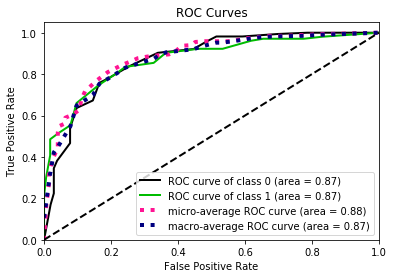

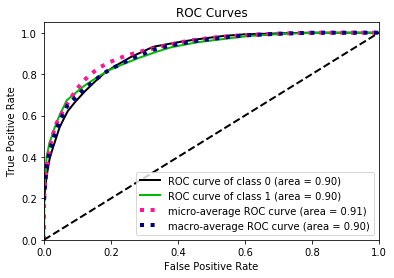

In [24]:
skplt.metrics.plot_roc_curve(y_test, y_pred)
skplt.metrics.plot_roc_curve(y_train,y_train_pred)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
y_predict=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
print("the accuracy",accuracy)

the accuracy 0.8097014925373134


In [26]:
#optimized_GBM.best_estimator_.feature_importances_
feature_importance=clf.best_estimator_.feature_importances_
print("feature importance:-",feature_importance)

feature importance:- [0.18146957 0.58959398 0.13138654 0.         0.         0.09754991]


In [27]:
from IPython.display import Image

In [28]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import pydotplus

In [29]:
feature_name=list(X.columns)
feature_name

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [30]:
dot_data=StringIO()

In [31]:
export_graphviz(clf.best_estimator_,feature_names=feature_name,filled=True,rounded=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Sex <= 0.5\\ngini = 0.473\\nsamples = 623\\nvalue = [384, 239]", fillcolor="#f5cfb4"] ;\n1 [label="Pclass <= 2.5\\ngini = 0.382\\nsamples = 218\\nvalue = [56, 162]", fillcolor="#7dbfee"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Fare <= 13.25\\ngini = 0.097\\nsamples = 117\\nvalue = [6, 111]", fillcolor="#44a2e6"] ;\n1 -> 2 ;\n3 [label="gini = 0.278\\nsamples = 18\\nvalue = [3, 15]", fillcolor="#61b1ea"] ;\n2 -> 3 ;\n4 [label="Fare <= 28.856\\ngini = 0.059\\nsamples = 99\\nvalue = [3, 96]", fillcolor="#3fa0e6"] ;\n2 -> 4 ;\n5 [label="gini = 0.121\\nsamples = 31\\nvalue = [2, 29]", fillcolor="#47a4e7"] ;\n4 -> 5 ;\n6 [label="Fare <= 116.638\\ngini = 0.029\\nsamples = 68\\nvalue = [1, 67]", fillcolor="#3c9ee5"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 50\\nvalue = [0, 50]", fillcolor="#399de5"] ;\n6 -> 7 ;\n8 [label

In [32]:
"""graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())"""

'graph=pydot.graph_from_dot_data(dot_data.getvalue())\nImage(graph[0].create_png())'

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


^
Expected {'graph' | 'digraph'}  (at char 0), (line:1, col:1)


In [34]:
"""graph[0].write_png("dtree2.png")
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-48-b404494ad3df> in <module>
----> 1 graph[0].write_png("dtree2.png")

TypeError: 'NoneType' object is not subscriptable"""

'graph[0].write_png("dtree2.png")\n---------------------------------------------------------------------------\nTypeError                                 Traceback (most recent call last)\n<ipython-input-48-b404494ad3df> in <module>\n----> 1 graph[0].write_png("dtree2.png")\n\nTypeError: \'NoneType\' object is not subscriptable'

In [35]:
from sklearn import tree 
dotfile =StringIO()
tree.export_graphviz(clf.best_estimator_,feature_names=feature_name,filled=True,rounded=True, out_file=dotfile)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dtree.png")

True

In [36]:
(graph,)=pydot.graph_from_dot_data(dotfile.getvalue())

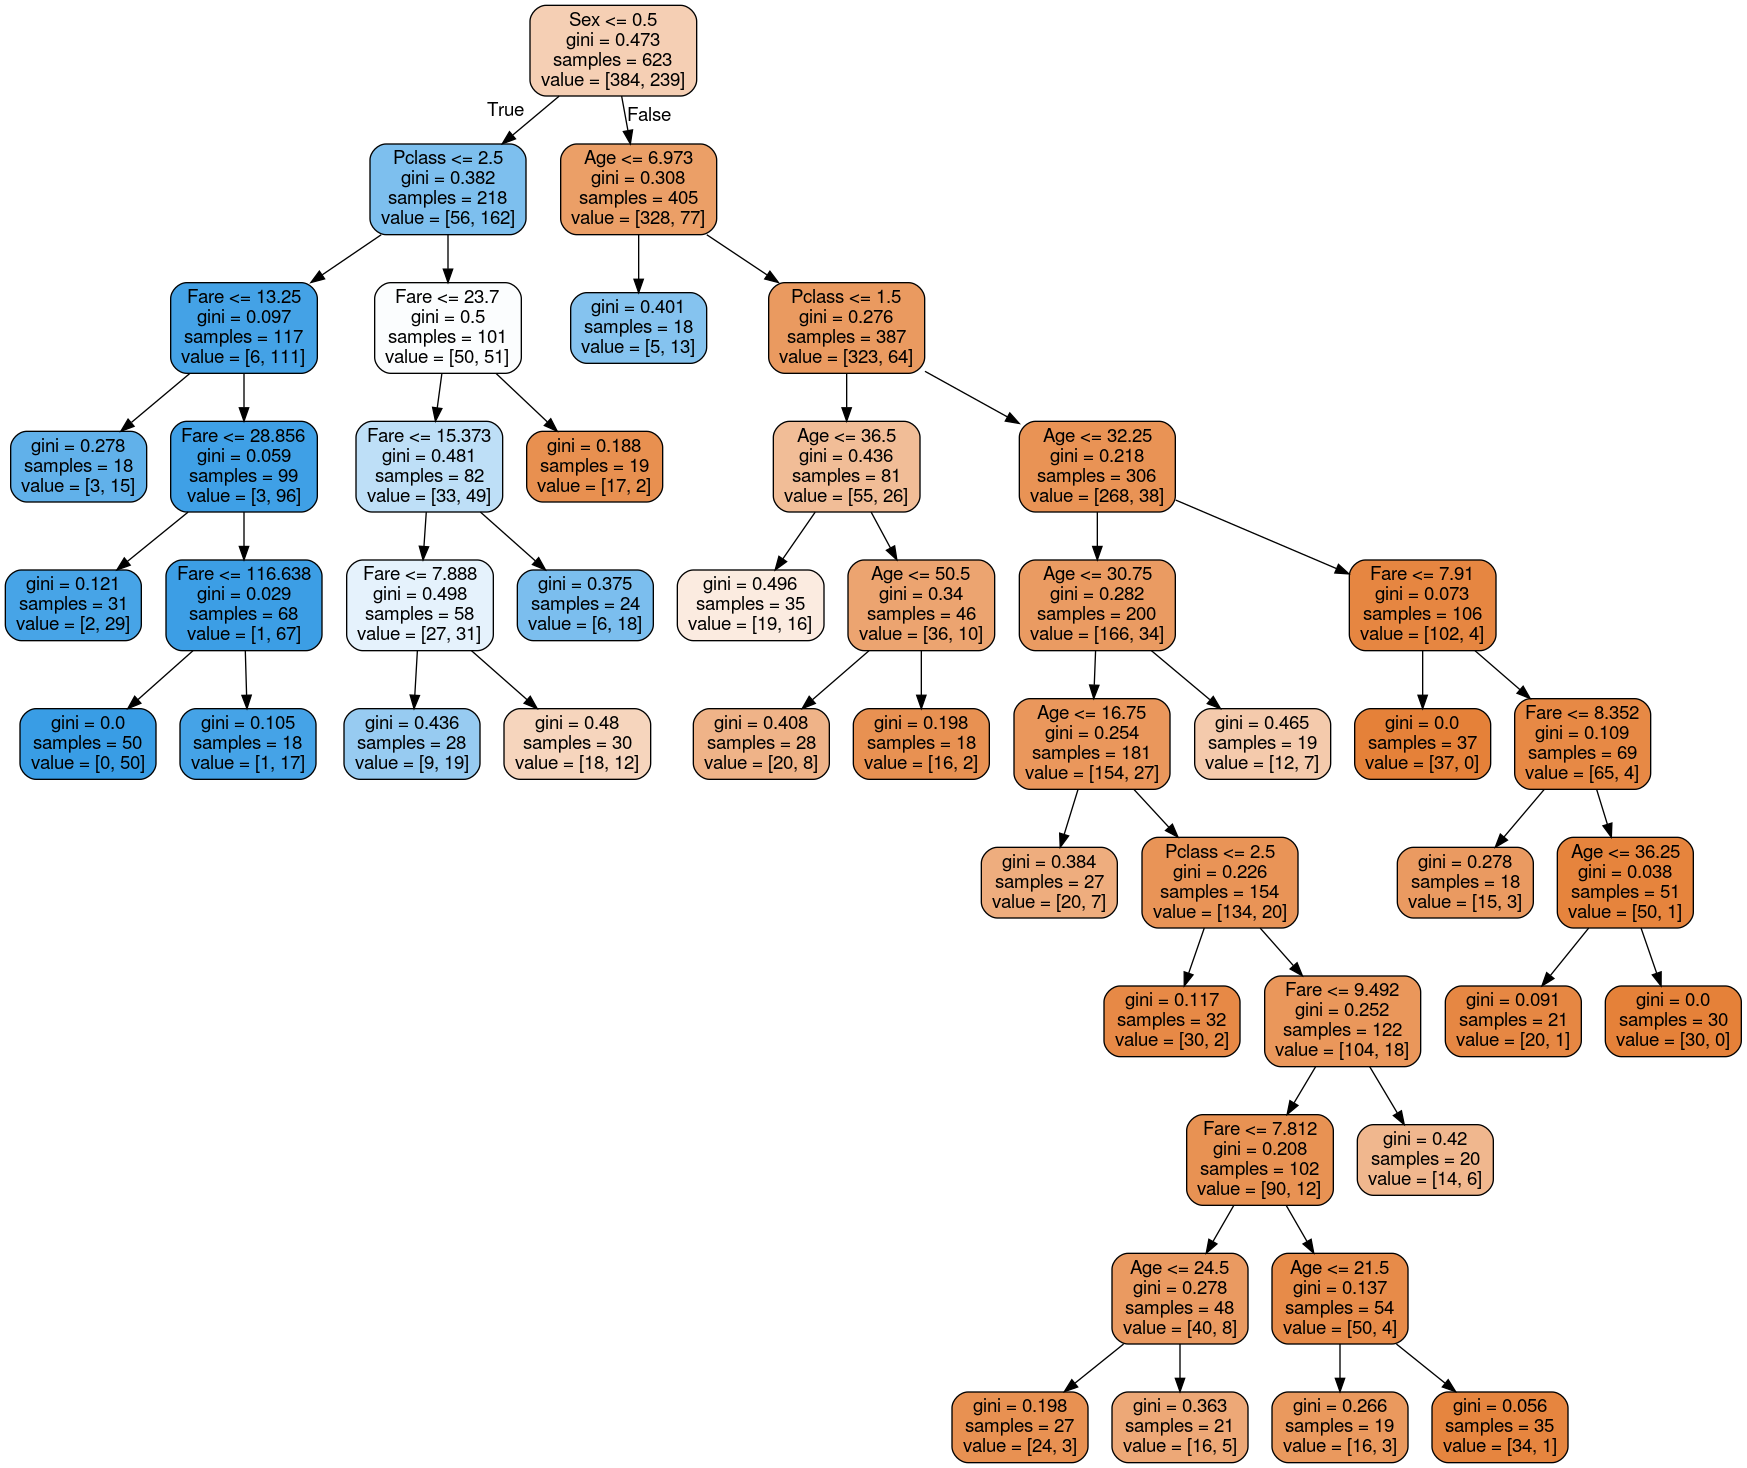

In [37]:
Image(graph.create_png())

In [39]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

In [42]:
train_auc=clf.cv_results_["mean_train_score"]
train_std=clf.cv_results_["std_train_score"]
test_auc=clf.cv_results_["mean_test_score"]
test_std=clf.cv_results_["std_test_score"]

In [44]:
print(len(train_auc))
print(len(test_auc))

390
390


In [51]:
x1=[]
y1=[]
max_depth=list(np.arange(10,100,3))
min_samples_leaf=list(np.arange(7,20))
print(len(max_depth))
print(len(min_samples_leaf))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

30
13


In [55]:
from itertools import repeat
train_auc_score=clf.cv_results_["mean_train_score"]
test_auc_score=clf.cv_results_["mean_test_score"]
x1 = [x for item in max_depth for x in repeat(item, 13)]
y1 = [y for item in min_samples_leaf for y in repeat(item, 30)]

In [57]:
trace1 = go.Scatter3d(x=x1,y=y1,z=train_auc_score, name="train auc")
trace2 = go.Scatter3d(x=x1,y=y1,z=test_auc_score, name="test auc")
data = [trace1, trace2]
layout = go.Layout(scene = dict(
xaxis = dict(title='max_depth'),
yaxis = dict(title='min_samples_leaf'),
zaxis = dict(title='AUC'),))
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')